# CSE 6367 Programming Assignment 2 (P2)

## Spring 2023

## Due: 11:59pm Central Time, Wednesday, April 5, 2023

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Task 1 (50 points) 

Implement Hough transform from scratch to detect circles in the image. Refer to this wiki page for pseudocode(https://en.wikipedia.org/wiki/Circle_Hough_Transform). Superimpose detected circles on the original image.

Note: You shouldn't use cv2.HoughCircles() to detect the circles.

![circles-2.jpeg](attachment:circles-2.jpeg)

1326 1326
edge_imgs Array shape:  (200, 240)
Accu Array shape:  (200, 240, 3)


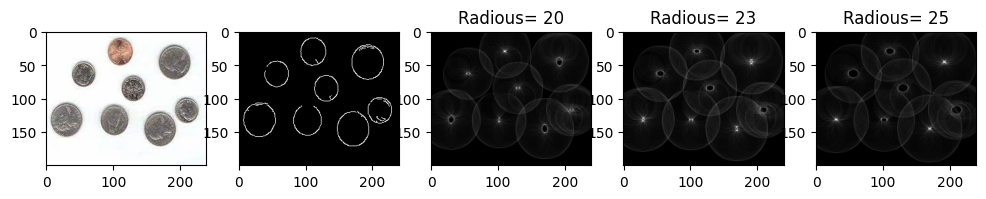

Radious 20= Red
Radious 23= Green
Radious 25= Blue



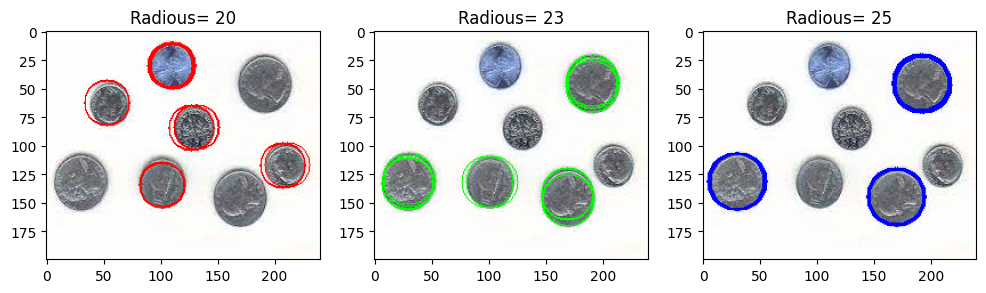

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def canny_edge_detection(img):
    return cv2.Canny(img,300,800)


coin_img = cv2.imread('./Images/circles.jpeg')
fig, axes = plt.subplots(1,5,figsize=(12,12))
coin_img = cv2.cvtColor(coin_img,cv2.COLOR_BGR2RGB)
axes[0].imshow(coin_img)
coin_img = cv2.cvtColor(coin_img,cv2.COLOR_RGB2GRAY)

edge_imgs = canny_edge_detection(coin_img)
axes[1].imshow(edge_imgs,cmap='gray')


circle_coordinates=np.where(edge_imgs>0)
print(len(circle_coordinates[0]),len(circle_coordinates[1]))
radious=[20,23,25]
acc_threshold = 110
a_array = np.zeros((edge_imgs.shape[0],edge_imgs.shape[1],len(radious)))
print("edge_imgs Array shape: ",edge_imgs.shape)
print("Accu Array shape: ",a_array.shape)
for i in range(len(radious)):
    for co_ordinates in zip(circle_coordinates[0],circle_coordinates[1]):
    #     print(co_ordinates)
        y, x = co_ordinates
        for theta in range(0,361):
            a = int(x - (radious[i] * np.cos(theta * (np.pi / 180))))
            b = int(y - (radious[i] * np.sin(theta * (np.pi / 180))))
            # print(a,b)
            if((0<=a<edge_imgs.shape[1]) and (0<=b<edge_imgs.shape[0])):
              a_array[b, a, i] = a_array[b,a,i]+1
    axes[i+2].set_title('Radious= {}'.format(radious[i]))
    axes[i+2].imshow(a_array[:,:,i],cmap='gray')

# print(len(circles))
plt.show()

print("Radious 20= Red")
print("Radious 23= Green")
print("Radious 25= Blue\n")
colors = {0:(255,0,0),1:(0,255,0),2:(0,0,255)}
fig2, axes2 = plt.subplots(1,3,figsize=(12,12))
for i in range(len(radious)):
  img_color = cv2.imread('./Images/circles.jpeg')
  axes2[i].set_title('Radious= {}'.format(radious[i]))
  radious_i_centers = np.where(a_array[:,:,i]>acc_threshold)
  #print(radious1_centers)
  for yx_point in zip(radious_i_centers[0],radious_i_centers[1]):
    t=cv2.circle(img_color,(yx_point[1],yx_point[0]),radious[i],color=colors[i],thickness=1)
  axes2[i].imshow(t)
# print(max(a_array[1,1,:]))
axes2[2].imshow(img_color)
plt.show()

### Task 2 (50 points)

Implement Harris corner detector from scratch. The steps are mentioned in Slide 46-47 on your lecture slide "5-Harris-corner-detector.pdf". Mark detected corners on original image. 

Note: You shouldn't use cv2.cornerHarris() to detect the corners.

![checkerboard-2.png](attachment:checkerboard-2.png)

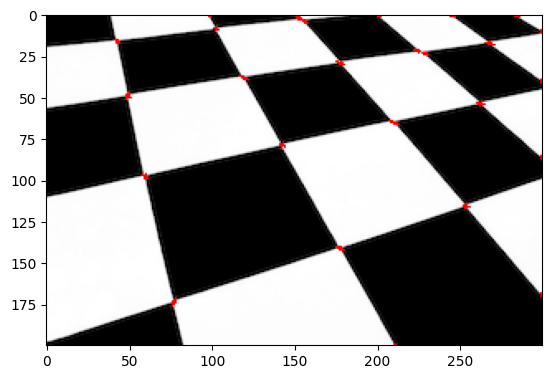

In [34]:
import cv2
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
%matplotlib inline

def harris_corner_detector(img, block_size=2, ksize=3, k=0.04, threshold=0.01):
    # 1 Compute x and y derivatives of image
    Ix = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=ksize)
    Iy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=ksize)
    
    # 2. Compute products of derivatives at every pixel
    Ix2 = Ix ** 2
    Iy2 = Iy ** 2
    Ixy = Ix * Iy
    
    # 3. Compute the sums of the products of derivatives at each pixel
    sx2 = cv2.boxFilter(Ix2, -1, (block_size, block_size))
    sy2 = cv2.boxFilter(Iy2, -1, (block_size, block_size))
    sxy = cv2.boxFilter(Ixy, -1, (block_size, block_size))

    # 4 & 5 Compute the response of the detector at each pixel
    det = (sx2 * sy2) - (sxy ** 2)
    trace = sx2 + sy2
    response = det - k * (trace ** 2)
    # print('Response= ',response)
    # print('Response= ',response.shape)
    
    return response

img = cv2.imread('/content/Images/checkerboard.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


corners = harris_corner_detector(img)
# print(corners)

img_corners = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

thres = 0.01*corners.max()
for rowindex, resp in enumerate(corners):
  for colindex, r in enumerate(resp):
      if r > thres:
          img_corners[rowindex, colindex] = [255,0,0]

plt.imshow(img_corners)
plt.show()


## Submission Guidelines:

    Submit through Canvas your source code in a single .ipynb file. The name of the .ipynb file should be YourStudentID.ipynb. (For example: 1001234567.ipynb)
    Import all the images from the ./Images directory. Your TA will use the same directory name to grade your submission.
    You don't need to attach the image file with your submission.
